**Power Plant Dataset**
<br>
AT — Ambient Temperature (°C)<br>
this is the air around the power plant
<br>
V — Exhaust Vacuum (cm Hg)<br>
this refers to the pressure difference created in the exhaust of the turbine measured in centimeters of mercury.
<br>
AP — Ambient Pressure (millibar)<br>
air pressure around the power plant
<br>
RH — Relative Humidity (%)<br>
amount of moisture in the air
<br>
PE - Net Electrical Energy Output<br>
the amount of electricity the power plant is generating 

This is regression problem as the dataset has continuous numerical value 

> This problem statement is the real world problem solving this would help in improving my ML and DL skills 
and i will get to work on industry relevant problem.

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
import warnings
warnings.filterwarnings('ignore')

In [109]:
# loading the dataset
df = pd.read_excel('energy.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [110]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [111]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [112]:
df.shape

(9568, 5)

<Axes: >

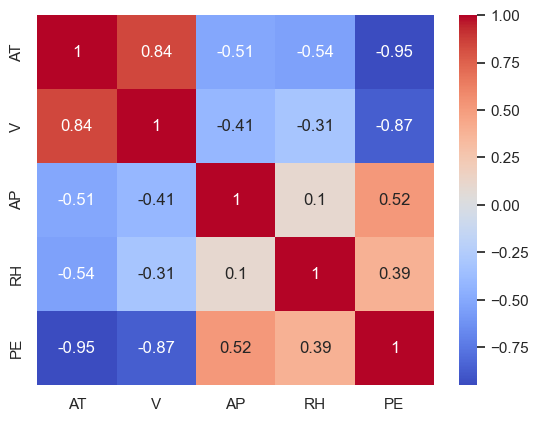

In [113]:
# visualize the dataset 
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

> By observing the output of correlation heatmap we can see that AP and RH are postively correlated with the output variable PE<br>
AT and V are negatively correlated with PE that means if AT and V increases the Power Enery will decrease

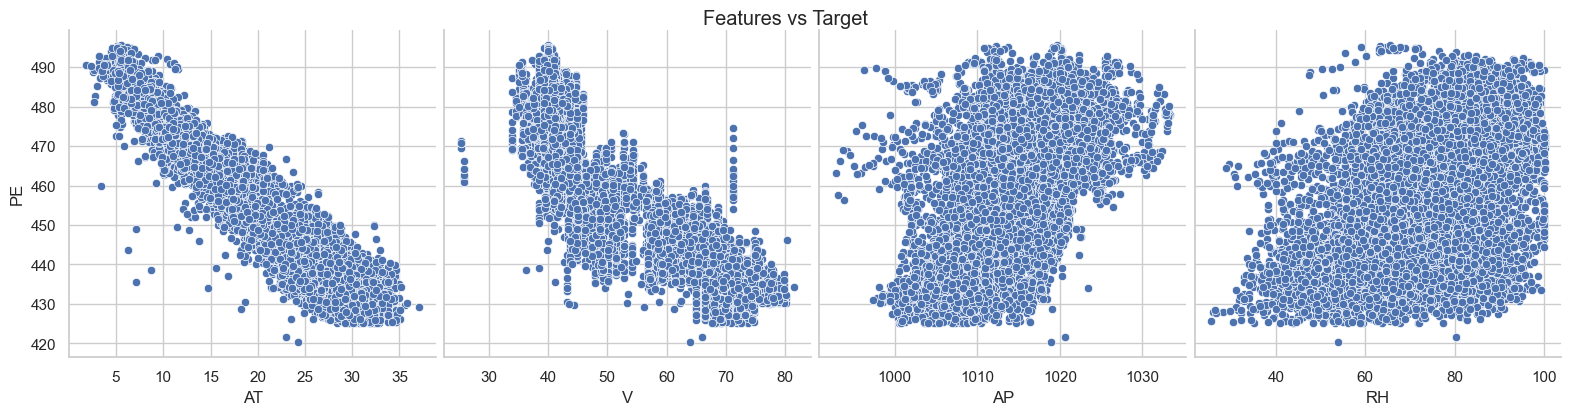

In [114]:
sns.pairplot(df,x_vars=['AT','V','AP','RH'],y_vars='PE',height=4,aspect=1,kind='scatter')
plt.suptitle('Features vs Target',y=1.02)
plt.show()

In [115]:
X = df.drop('PE',axis=1)
y = df['PE']

**Feature Extraction**

In [116]:
# importing Recursive Feature Elimination (RFE) from sklearn for feature selection
from sklearn.feature_selection import RFE
# importing Linear Regression model to use for feature selection
from sklearn.linear_model import LinearRegression

# creating a linear regression model object
linear_model = LinearRegression()

# setting up RFE to select the top 3 features based on the linear model
rfe = RFE(linear_model, n_features_to_select=3)

# fitting the RFE model on the data 
rfe.fit(X, y)

# printing all feature names from your dataset (X columns)
print('features are : ', X.columns)

# printing which features were selected by RFE (True means selected, False means not selected)
print('selected features : ', rfe.support_)

# printing the ranking of all features (1 means selected, higher numbers are less important)
print('feature ranking : ', rfe.ranking_)

features are :  Index(['AT', 'V', 'AP', 'RH'], dtype='object')
selected features :  [ True  True False  True]
feature ranking :  [1 1 2 1]


> By applying recursive feature elimination we came to know that AP is least important  

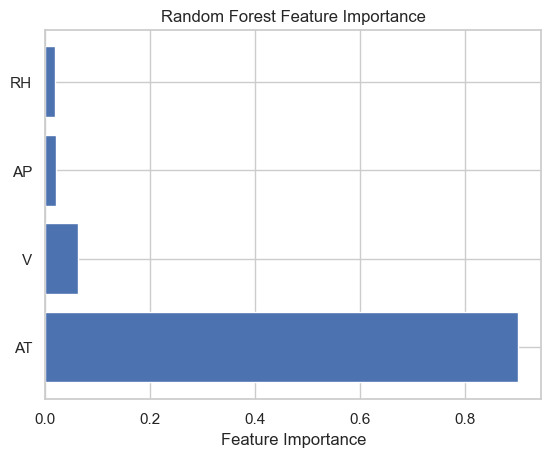

In [117]:
# plotting random forest feature importance
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X,y)

importance = rf.feature_importances_
features = X.columns
plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

> by observing the plot of random forest feature importance AT is most important feature and V is moderate important feature AP and RH are not that much important features 

In [118]:
# splitting data into train test 
from sklearn.model_selection import train_test_split
X = df[['AT', 'V', 'RH']]
y = df['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
# scaling data using StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
# applying random forest on data which is scaled using StandardScaler()
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
random_f = RandomForestRegressor()
random_f.fit(X_train_scaled, y_train)
y_pred = random_f.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
testing = random_f.score(X_test_scaled, y_test)
training = random_f.score(X_train_scaled, y_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Training Accuracy : {training}')
print(f'Testing Accuracy : {testing}')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

Training Accuracy : 0.9939138441236041
Testing Accuracy : 0.956735919763746
MAE: 2.583683281086733
MSE: 12.549091716050167
R² Score: 0.956735919763746


In [121]:
# scale the dataset using MinMaxScaler() - it scales data into fixed range. 0,1
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
X = scaler2.fit_transform(df[['AT','V','RH']])

In [122]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.25,random_state=42)

In [123]:
X_train1.shape

(7176, 3)

In [124]:
X_test1.shape

(2392, 3)

In [125]:
# applying random forest on MinMaxScaler scaled data
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
random_f = RandomForestRegressor()
random_f.fit(X_train1, y_train1)
y_pred = random_f.predict(X_test1)

mae = mean_absolute_error(y_test1, y_pred)
testing = random_f.score(X_test1, y_test1)
training = random_f.score(X_train1, y_train1)
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)
print(f'Training Accuracy : {training}')
print(f'Testing Accuracy : {testing}')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

Training Accuracy : 0.9938514486030988
Testing Accuracy : 0.9537746823890203
MAE: 2.653358444816056
MSE: 13.43683159224914
R² Score: 0.9537746823890203


> by observing the both scalers StandarScaler has low mean absoluate error and mean squared error than MinMaxScaler 
so by comparing there scores StandardScaler is performing well.

In [126]:
# linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
testing = model.score(X_test_scaled, y_test)
training = model.score(X_train_scaled, y_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Training Accuracy : {training}')
print(f'Testing Accuracy : {testing}')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

Training Accuracy : 0.9280074675690626
Testing Accuracy : 0.9297940672251247
MAE: 3.599855520193023
MSE: 20.363791038471987
R² Score: 0.9297940672251247


In [127]:
# weights of features
print(model.coef_)

[-15.06669315  -2.88099593  -2.41752495]


> these weights are indicating that if feature increases the output will decrease and vice versa

In [128]:
# decision tree model
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

In [129]:
# using grid search for best hyper parameter tunning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ['squared_error','friedman_mse','absolute_error'],
    'max_depth' : [5]
}
grid = GridSearchCV(tree, param_grid,cv=5)

In [130]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5]})

In [131]:
# using best parameters building decision tree 
decision_tree = DecisionTreeRegressor(**grid.best_params_)
decision_tree.fit(X_train_scaled, y_train)
y_pred = decision_tree.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
testing = decision_tree.score(X_test_scaled, y_test)
training = decision_tree.score(X_train_scaled, y_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Training Accuracy : {training}')
print(f'Testing Accuracy : {testing}')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

Training Accuracy : 0.9363977322694258
Testing Accuracy : 0.9322945752834642
MAE: 3.4392292300579874
MSE: 19.638498722317983
R² Score: 0.9322945752834642


In [132]:
print(decision_tree.feature_importances_)

[0.95501279 0.04185756 0.00312965]


> here the weight of feature is very high

In [133]:
# using support vector regressor
from sklearn.svm import SVR

svr = SVR()

In [134]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale','auto'],
    'C' : [1,2,3,4,5,6,7,8,9,10],
    'max_iter' : [10,20,30]
}
grid = GridSearchCV(svr,param_grid,cv=5,scoring='f1')

In [135]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [10, 20, 30]},
             scoring='f1')

In [136]:
best_param = grid.best_params_

In [137]:
# using best parameters building support vector model
support_vec = SVR(**best_param)
support_vec.fit(X_train_scaled, y_train)
y_pred = support_vec.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
testing = support_vec.score(X_test_scaled, y_test)
training = support_vec.score(X_train_scaled, y_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Training Accuracy : {training}')
print(f'Testing Accuracy : {testing}')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

Training Accuracy : 0.00046117680069646116
Testing Accuracy : -0.003916286760651921
MAE: 15.005633951341514
MSE: 291.1939301378928
R² Score: -0.003916286760651921


In [138]:
print(support_vec.coef_)

[[-1.23614928  1.1629732   0.09505412]]


In [149]:
# import necessary libraries
import itertools # it provides fast memory efficient tools for working with iterator
import keras
from sklearn.metrics import mean_squared_error

# define lists of hyperparameters to try
optimizers = ['adam', 'sgd', 'rmsprop']
activations = ['relu', 'tanh']
neurons = [32, 64]
epochs = [10]
batch_sizes = [16]

# generate all combinations of hyperparameters
param_combinations = list(itertools.product(optimizers, activations, neurons, epochs, batch_sizes))

# create empty list to store results
results = []

# iterate through each combination of hyperparameters
for opt, act, neu, ep, bs in param_combinations:
    
    #print which combination is currently being tested
    print(f"Testing: Optimizer={opt}, Activation={act}, Neurons={neu}, Epochs={ep}, Batch Size={bs}")
    
    # define the ANN model with given parameters
    model = keras.Sequential([
        keras.layers.Dense(neu, input_dim=3, activation=act),  # input layer + hidden layer
        keras.layers.Dense(1)  # output layer for regression
    ])
    
    # compile the model using selected optimizer and loss function
    model.compile(optimizer=opt, loss='mse', metrics=['mae'])
    
    # train the model on the training data
    model.fit(X_train_scaled, y_train, epochs=ep, batch_size=bs, verbose=0)
    
    # make predictions on the test data
    y_pred = model.predict(X_test_scaled)
    
    # check if predictions contain NaNs (skip if yes)
    if np.isnan(y_pred).any():
        print("Skipping due to NaN in predictions.")
        continue

    #calculate mean squared error between predictions and true labels
    mse = mean_squared_error(y_test, y_pred)
    
    # store the result in the list
    results.append({
        'optimizer': opt,
        'activation': act,
        'neurons': neu,
        'epochs': ep,
        'batch_size': bs,
        'mse': mse
    })

# convert results list to DataFrame
df_results = pd.DataFrame(results)

# ort results by mse to find best performing combination
df_results.sort_values(by='mse').head()


Testing: Optimizer=adam, Activation=relu, Neurons=32, Epochs=10, Batch Size=16
60/60 [==============================] - 0s 3ms/step
Testing: Optimizer=adam, Activation=relu, Neurons=64, Epochs=10, Batch Size=16
60/60 [==============================] - 0s 3ms/step
Testing: Optimizer=adam, Activation=tanh, Neurons=32, Epochs=10, Batch Size=16
60/60 [==============================] - 0s 3ms/step
Testing: Optimizer=adam, Activation=tanh, Neurons=64, Epochs=10, Batch Size=16
60/60 [==============================] - 0s 4ms/step
Testing: Optimizer=sgd, Activation=relu, Neurons=32, Epochs=10, Batch Size=16
60/60 [==============================] - 0s 3ms/step
Skipping due to NaN in predictions.
Testing: Optimizer=sgd, Activation=relu, Neurons=64, Epochs=10, Batch Size=16
60/60 [==============================] - 0s 3ms/step
Skipping due to NaN in predictions.
Testing: Optimizer=sgd, Activation=tanh, Neurons=32, Epochs=10, Batch Size=16
60/60 [==============================] - 0s 3ms/step
Testing

,optimizer,activation,neurons,epochs,batch_size,mse
5,sgd,tanh,64,10,16,18.894445
4,sgd,tanh,32,10,16,24.905925
7,rmsprop,relu,64,10,16,48.570333
1,adam,relu,64,10,16,609.220038
6,rmsprop,relu,32,10,16,2653.836908


In [150]:
df_results = pd.DataFrame(df_results)
best_result = df_results.loc[df_results['mse'].idxmin()]
print("Best Parameters:")
print(best_result)

Best Parameters:
optimizer           sgd
activation         tanh
neurons              64
epochs               10
batch_size           16
mse           18.894445
Name: 5, dtype: object


In [151]:
# build model with best params
model = keras.Sequential([
    keras.layers.Dense(best_result['neurons'], input_dim=3, activation=best_result['activation']),
    keras.layers.Dense(1)
])
model.compile(optimizer=best_result['optimizer'], loss='mse', metrics=['mae'])

# train model again using best parameters
model.fit(X_train_scaled, y_train, epochs=best_result['epochs'], batch_size=best_result['batch_size'], verbose=1)

# predict
y_pred = model.predict(X_test_scaled)

Epoch 1/10
479/479 [==============================] - 2s 3ms/step - loss: 969.9584 - mae: 7.2564
Epoch 2/10
479/479 [==============================] - 2s 3ms/step - loss: 22.8109 - mae: 3.7183
Epoch 3/10
479/479 [==============================] - 2s 3ms/step - loss: 22.4550 - mae: 3.6738
Epoch 4/10
479/479 [==============================] - 1s 3ms/step - loss: 22.0436 - mae: 3.6597
Epoch 5/10
479/479 [==============================] - 1s 3ms/step - loss: 21.5198 - mae: 3.6091
Epoch 6/10
479/479 [==============================] - 1s 3ms/step - loss: 21.3151 - mae: 3.5755
Epoch 7/10
479/479 [==============================] - 1s 3ms/step - loss: 21.1613 - mae: 3.5689
Epoch 8/10
479/479 [==============================] - 1s 3ms/step - loss: 21.2125 - mae: 3.5775
Epoch 9/10
479/479 [==============================] - 2s 3ms/step - loss: 20.8481 - mae: 3.5454
Epoch 10/10
60/60 [==============================] - 0s 2ms/step


In [152]:
y_pred = y_pred.flatten()  
loss, mae = model.evaluate(X_test_scaled, y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

60/60 [==============================] - 1s 3ms/step - loss: 23.6445 - mae: 3.8499
MAE: 3.8499085903167725
MSE: 23.64446560676003
R² Score: 0.9184836575984329


In [153]:
# using MinMaxScaler() 
from sklearn.preprocessing import MinMaxScaler

min_scaler = MinMaxScaler()
X_train2 = min_scaler.fit_transform(X_train)
X_test2 = min_scaler.transform(X_test)

In [154]:
# build model with best params
model = keras.Sequential([
    keras.layers.Dense(best_result['neurons'], input_dim=3, activation=best_result['activation']),
    keras.layers.Dense(1)
])
model.compile(optimizer=best_result['optimizer'], loss='mse', metrics=['mae'])

# train model again using best parameters
model.fit(X_train2, y_train, epochs=20, batch_size=best_result['batch_size'], verbose=1)

# predict
y_pred = model.predict(X_test2)

Epoch 1/20
479/479 [==============================] - 2s 3ms/step - loss: 903.1264 - mae: 8.7385
Epoch 2/20
479/479 [==============================] - 2s 3ms/step - loss: 43.3649 - mae: 5.1776
Epoch 3/20
479/479 [==============================] - 2s 3ms/step - loss: 37.3918 - mae: 4.7666
Epoch 4/20
479/479 [==============================] - 2s 3ms/step - loss: 34.0470 - mae: 4.5995
Epoch 5/20
479/479 [==============================] - 2s 3ms/step - loss: 35.1754 - mae: 4.6691
Epoch 6/20
479/479 [==============================] - 1s 3ms/step - loss: 31.7378 - mae: 4.4315
Epoch 7/20
479/479 [==============================] - 1s 3ms/step - loss: 28.6552 - mae: 4.1995
Epoch 8/20
479/479 [==============================] - 2s 3ms/step - loss: 27.1430 - mae: 4.1146
Epoch 9/20
479/479 [==============================] - 2s 3ms/step - loss: 26.8504 - mae: 4.0655
Epoch 10/20
479/479 [==============================] - 1s 3ms/step - loss: 25.1189 - mae: 3.9179
Epoch 11/20
479/479 [=================

In [155]:
y_pred = y_pred.flatten() 
loss, mae = model.evaluate(X_test2, y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

60/60 [==============================] - 0s 4ms/step - loss: 62.1375 - mae: 6.8141
MAE: 6.814142227172852
MSE: 62.13752904717822
R² Score: 0.7857754885207076


> here i observed the error rate is high using MinMaxScaler() compared to StandardScaler() so i am going with StandardScaler

In [156]:
model_results = {
    'Model': ['Random Forest', 'Linear Regression', 'Decision Tree', 'SVR', 'ANN'],
    'R2 Score': [0.95, 0.92, 0.93, -0.00, 0.91],
    'MAE': [2.60, 3.59, 3.43, 15.00, 3.84],
    'MSE': [13.46, 20.36, 19.63, 291.19, 23.64]
}

df_models = pd.DataFrame(model_results)

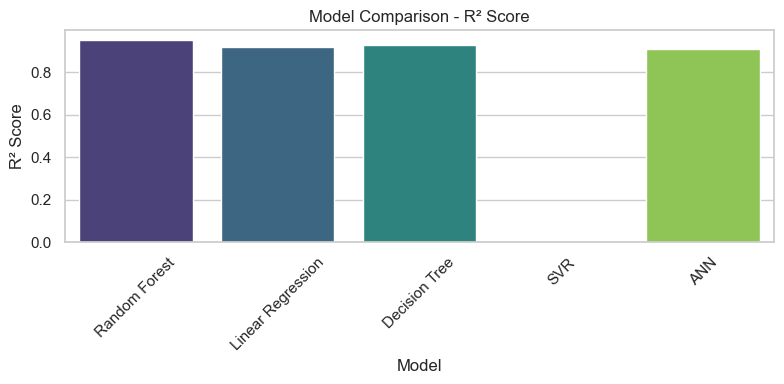

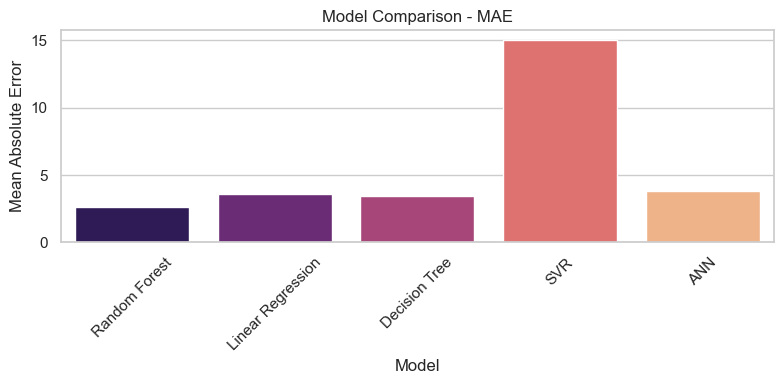

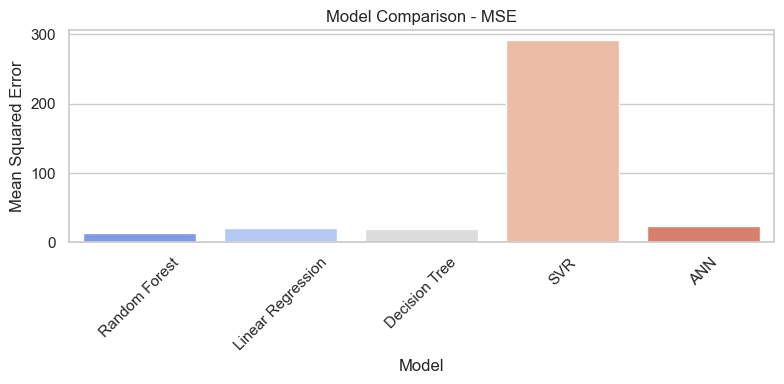

In [157]:
sns.set(style="whitegrid")

# R2 Score Plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='R2 Score', data=df_models, palette='viridis')
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MAE Plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='MAE', data=df_models, palette='magma')
plt.title('Model Comparison - MAE')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MSE Plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='MSE', data=df_models, palette='coolwarm')
plt.title('Model Comparison - MSE')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Random Forest Regressor is the best model which has low mean squared error, mean absolute error and high R2 score

**Predicting using Random Forest Regession**

In [165]:
input_data = np.array([[8.34, 40.77, 90.01]])
scaled_input = scaler.transform(input_data)
prediction = random_f.predict(scaled_input)
print("Predicted PE:", prediction)

Predicted PE: [480.5354]
